Problem rubnih vrijednosti
===

## Klasifikacija

Neka je 

$$ 
a\cdot u_{xx}+b\cdot u_{xt}+c\cdot u_{tt}+d\cdot u_x+e\cdot u_t + f\cdot u + g = 0
$$

i neka je

$$
D=b^2-4ac.
$$

Vrijedi sljedeća klasifikacija:

|D | D=0  | D<0 | D>0 |  
|:---:|:---:|:--:|:---:|
|Vrsta| parabolička | eliptička | hiperbolička |
|Problem| difuzija  | ravnoteža | valovi   |
|Domena -> Metoda | omeđena -> SLP | omeđena -> SLP | |
|                | neomeđena -> intregralne transformacije | neomeđena -> integralne transformacije | |


## Jednadžna difuzije - toplinska jednadžba - parabolička parcijalna differencijalna jednadžba

Zadan je problem 

$$
u_t-u_{xx}=0  \\
u(x,0)=|x|, \quad -2<x<2 \\
u_x(-2,t)=0, \quad u_x(2,t)=0, \quad t>0 
$$

Pretpostavimo 

$$
u(x,t)=X(x)T(t).
$$ 

Slijedi:

1. SLP: $ X''+\lambda X=0$ uz uvjete $X'(-2)=0$ i $X(2)=0$
2. Populacijska jednadžba: $T'+\lambda T=0$

Za $\lambda \geq 0$ SLP ima svojstvene vrijednosti 

$$
\lambda_n = \frac{n^2\pi^2}{4}, \quad n\in \mathbb{N}\cup \{0\}.
$$

i pripadne svojstvene funkcije 

$$ 
X_n(x)= A_n \cos \big(\frac{n\pi}{2}x\big ).
$$

Za svaki $\lambda_n$ rješenje populacijske jednadžbe glasi 

$$
T_n(t)=B_n e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

što zajedno daje 

$$
u_n(x,t)= C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}.
$$

> Svaka funkcije $u_n$ zadovoljava jednadžbu i rubne uvjete. 

> Prema __principu superpozicije__ i funkcija 

$$
u(x,t)=\sum_{n=0}^\infty u_n(x,t)= \sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

> također zadovoljava jednadžbu i rubne uvjete pa treba još odabrati koeficijente $C_n$ tako da se zadovolji i početni uvijet - radi se o razvoju u _(generalizirani) Fourierov red_:

$$
u(x,0)=\sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) \\
C_n=  \displaystyle \frac{ \big(|x|, \cos \big(\frac{n\pi}{2}x\big ) \big)}
{\big (\cos \big(\frac{n\pi}{2}x\big ), \cos \big(\frac{n\pi}{2}x\big ) \big)} \tag{*}
$$

Probajmo simboličko računanje - treba nam paket `PyPlot.jl` za crtanje i paket `SymPy.jl` za simboličko računanje:

In [35]:
using PyPlot
using SymPy

In [36]:
x=Sym("x")
n=symbols("n",integer=true)

n

In [37]:
f(x)=abs(x)*cos(n*pi*x/2)

f (generic function with 1 method)

In [38]:
f(2)

      n
2⋅(-1) 

In [39]:
integrate(f,-2,2)

2                   
⌠                   
⎮     ⎛π⋅n⋅x⎞       
⎮  cos⎜─────⎟⋅│x│ dx
⎮     ⎝  2  ⎠       
⌡                   
-2                  

Ovo nije išlo pa trebamo iskoristiti parnost podintegralne funkcije:

In [40]:
f(x)=x*cos(n*pi*x/2)

f (generic function with 1 method)

In [41]:
integrate(f,0,2)

⎧       2         for n = 0
⎪                          
⎪      n                   
⎨4⋅(-1)      4             
⎪─────── - ─────  otherwise
⎪  2  2     2  2           
⎩ π ⋅n     π ⋅n            

Provjerimo normiranost svojstvenih funkcija, odnosno izračunajmo nazivnike u (*):

In [42]:
integrate(x-> cos(n*pi*x/2)^2,0,2)

⎧       π⋅n    
⎪2  for ─── = 0
⎨        2     
⎪              
⎩1   otherwise 

Vidimo da je 

\begin{align}
& C_0=1, \\
& C_{2k}=0, \\
& C_{2k-1}=\displaystyle\frac{-8}{(2k-1)^2\pi^2},
\end{align}

odnosno

$$
u(x,t)=1 - \sum_{k=1}^\infty \frac{8}{(2k-1)^2\pi^2}
\cos \bigg(\frac{(2k-1)\pi}{2}x\bigg ) e^{\displaystyle-\frac{(2k-1)^2\pi^2}{4} t}.
$$

Definirajmo sumu prvih $n$ članova reda:

In [43]:
k=symbols("k",integer=true)
t=symbols("t")
u(n)=1-8*summation(cos((2*k-1)*π.*x/2)*exp(-(2*k-1)^2*π^2.*t/4)/((2*k-1)^2*π^2),(k,1,n))

u (generic function with 1 method)

In [44]:
free_symbols(u(2))

2-element Array{SymPy.Sym,1}
⎡t⎤
⎢ ⎥
⎣x⎦

In [45]:
u(20)(0,0.5)

                         ___                                                  
- - -0.392404747599411⋅╲╱ 2  - - -0.0230534158366905⋅cos(1.75⋅π) - - -0.100781

                         
122009626⋅cos(0.75⋅π) + 1

### Crtanje

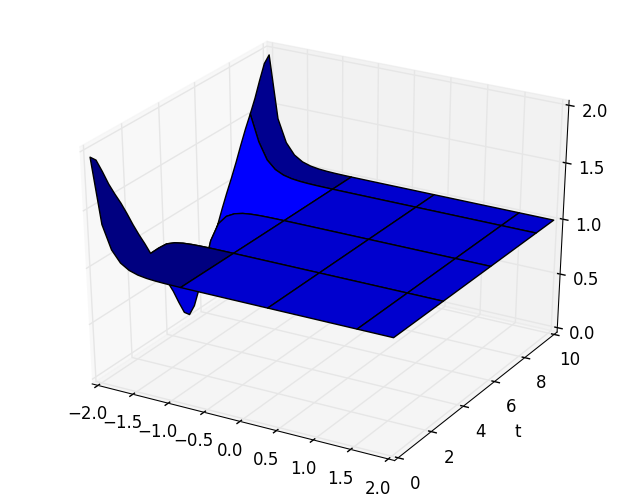

PyObject <matplotlib.text.Text object at 0x7f08e7cfce48>

In [46]:
plot_surface(u(4),(x,-2,2),(t,0,10))
ylabel("t")

__Napomena__ nešto nije u redu s osima?

Crtanje traje dugo jer se radi o simboličkom računanju, što je sporo.

Pogledajmo interaktivno konvergenciju - treba nam paket `Interact.jl`:

In [13]:
using Interact

Interact.Slider{Int64}([Reactive.Input{Int64}] 3,"l",3,1:5)

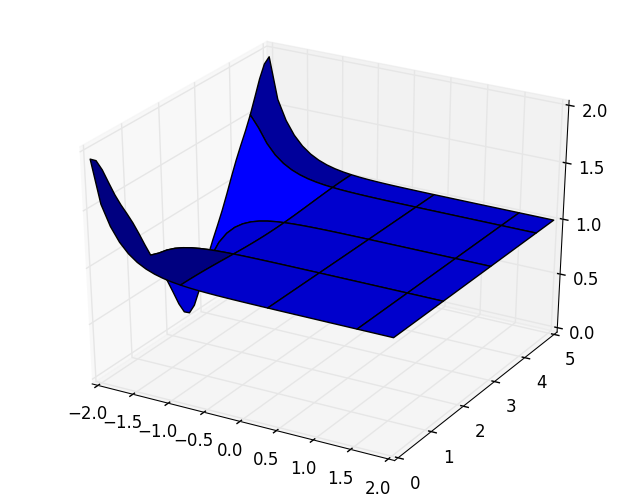

In [14]:
g=figure()
@manipulate for l=1:5; withfig(g) do
        plot_surface(u(l),(x,-2,2),(t,0,5))
    end
end

### Numeričko crtanje

In [47]:
# Definirajmo prostor točaka (Julia nema funkciju meshgrid(), ovo je zamjena)
X=linspace(-2,2)
T=linspace(0,5)
gridX= map(Float64,[x for x in X, t in T])
gridT= map(Float64,[t for x in X, t in T])

50x50 Array{Float64,2}:
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 ⋮                                  ⋱                                
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  

Interact.Slider{Int64}([Reactive.Input{Int64}] 5,"l",5,1:10)

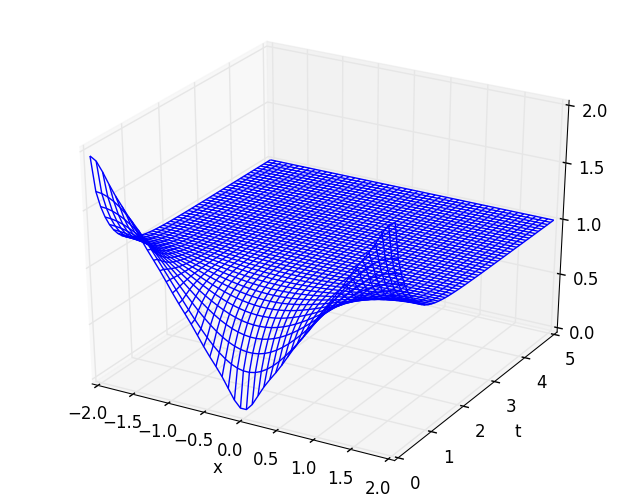

In [48]:
g=figure()
@manipulate for l=1:10; withfig(g) do
        h=1-8*sum([cos((2*k-1)*pi*gridX/2).*exp(-(2*k-1)^2*pi^2*gridT/4)/((2*k-1)^2*π^2) 
            for k in collect(1:l)]) 
        mesh(X'',T',h) # ili surf(h)
        xlabel("x")
        ylabel("t")
    end
end

## Primjer 1

$$
u_t-u_{xx}=-u \\
u(x,0)=f(x)=\begin{cases}0, \quad -1<x<0 \\ x,\quad 0<x<1 \end{cases} \\
u(-1,t)=0,\quad u(1,t)=0 
$$

Za detalje o simboličkom računanju pogledajte
[SymPy Tutorial](https://github.com/jverzani/SymPy.jl/blob/master/examples/tutorial.md).

Uvrštavanjem 

$$
u(x,t)=X(x)T(t)
$$

imamo jednadžbu 

$$
T'X-TX''=-TX,
$$

odnosno dvije jednadžbe

$$
\frac{X''}{X}=\frac{T'+T}{T}=-\lambda.
$$

Jednadžba po $T$ je populacijska jednadžba koja glasi

$$
T'=-(\lambda+1)T
$$

i čije rješenje je

$$
T=Ce^{-(\lambda+1)t}.
$$

Riješimo jednadžbu po $X$:

In [49]:
F = symbols("F", cls=SymFunction)

(anonymous function)

In [50]:
λ=symbols("λ",real=true,positive=true)
diffeq = Eq(diff(F(x), x, 2) +λ*F(x), 0)

           2          
          d           
λ⋅F(x) + ───(F(x)) = 0
           2          
         dx           

In [51]:
ex = dsolve(diffeq, F(x))

             ⎛    ___⎞         ⎛    ___⎞
F(x) = C₁⋅sin⎝x⋅╲╱ λ ⎠ + C₂⋅cos⎝x⋅╲╱ λ ⎠

In [52]:
ex1 = rhs(ex)

      ⎛    ___⎞         ⎛    ___⎞
C₁⋅sin⎝x⋅╲╱ λ ⎠ + C₂⋅cos⎝x⋅╲╱ λ ⎠

Uvrstimo rubne uvjete:

In [53]:
ex1a=subs(ex1,x,-1)

        ⎛  ___⎞         ⎛  ___⎞
- C₁⋅sin⎝╲╱ λ ⎠ + C₂⋅cos⎝╲╱ λ ⎠

In [22]:
ex1b=subs(ex1,x,1)

      ⎛  ___⎞         ⎛  ___⎞
C₁⋅sin⎝╲╱ λ ⎠ + C₂⋅cos⎝╲╱ λ ⎠

In [54]:
# solve(ex2a,Sym("C2"))

In [55]:
solve(cos(sqrt(λ)),λ)

2-element Array{SymPy.Sym,1}
⎡  2 ⎤
⎢ π  ⎥
⎢ ── ⎥
⎢ 4  ⎥
⎢    ⎥
⎢   2⎥
⎢9⋅π ⎥
⎢────⎥
⎣ 4  ⎦

Sustav jednadžbi je homogen i glasi

$$
\begin{bmatrix} -C_1 & C_2 \\ C_1 & C_2 \end{bmatrix} \begin{bmatrix}\sin \sqrt{\lambda} \\ \cos\sqrt{\lambda} \end{bmatrix} = \begin{bmatrix} 0\\ 0\end{bmatrix}.
$$

Trivijalno rješenje je u ovom slučaju očito nemoguće, a netrivijalna rješenje postoje kada je 
matrica sustava singularna, odnosno kada je $C_1=0$ ili $C_2=0$.

Kada je $C_1=0$ onda je $\cos\sqrt{\lambda}=0$ pa je 

$$
\lambda=\frac{2n+1}{2}\pi, \quad n=0,1,2,3,\ldots
$$

Kada je $C_2=0$ onda je $\sin\sqrt{\lambda}=0$ pa je 

$$
\lambda=n\pi, \quad n=0,1,2,3,\ldots
$$

Dakle, rješenje problema koje zadovoljava jednadžbu i rubne uvjete ima oblik:

$$
u(x,t)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)e^{-\big(\big[\frac{2n+1}{2}\pi\big]^2+1\big)t}
+ b_n \sin (n\pi x)e^{-([n\pi]^2+1)t}.
$$

Potrebno zadovoljiti još početni uvjet:

$$
u(x,0)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)
+ b_n \sin (n\pi x)=f(x).
$$
 
Radi se o razvoju u generalizirani Fourierov red funkcije f(x): 

In [56]:
p=piecewise((0,x≪0),(x, (0<=x) ∧ (x<=1)),(0,x≫1))

⎧0      for x < 0    
⎪                    
⎨x  for 0 ≤ x ∧ x ≤ 1
⎪                    
⎩0      for x > 1    

In [57]:
# SymPy.plot(p,-1,1)

Provjerimo ortonormiranost svojstvenih funkcija i izračunajmo koeficijente $a_n$, $b_n$ (integriranje od $a_n$ traje duže!):

In [58]:
integrate(x->cos((2*n+1)*pi*x/2)^2,-1,1)

1

In [59]:
integrate(x->sin(n*pi*x)^2,-1,1)

⎧0  for π⋅n = 0
⎨              
⎩1   otherwise 

In [29]:
a=integrate(x->x*cos((2*n+1)*pi*x/2),0,1)

           n                        n                                
     4⋅(-1) ⋅π⋅n              2⋅(-1) ⋅π                   4          
───────────────────── + ───────────────────── - ─────────────────────
   2  2      2      2      2  2      2      2      2  2      2      2
4⋅π ⋅n  + 4⋅π ⋅n + π    4⋅π ⋅n  + 4⋅π ⋅n + π    4⋅π ⋅n  + 4⋅π ⋅n + π 

In [30]:
N(a(0))

0.23133503779823025

In [60]:
b=integrate(x->x*sin(n*pi*x),0,1)

⎧   0     for n = 0
⎪                  
⎪     n            
⎨-(-1)             
⎪───────  otherwise
⎪  π⋅n             
⎩                  

In [32]:
b(0)

0

In [61]:
X=linspace(-1,1)
T=linspace(0,5)
gridX= map(Float64,[x for x in X, t in T])
gridT= map(Float64,[t for x in X, t in T])

50x50 Array{Float64,2}:
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 ⋮                                  ⋱                                
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  

Interact.Slider{Int64}([Reactive.Input{Int64}] 10,"l",10,1:20)

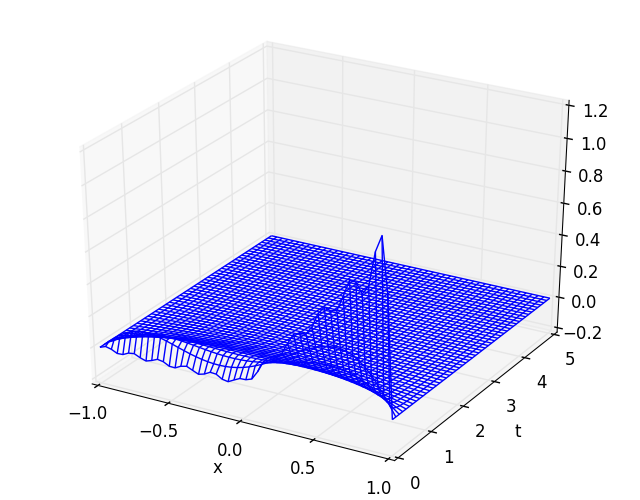

In [62]:
g=figure()
@manipulate for l=1:20; withfig(g) do
        h=sum([N(a(k))*cos((2*k+1)*pi*gridX/2).*exp(-(((2*k+1)*pi/2)^2/4+1)*gridT)+N(b(k))*sin(k*pi*gridX).*exp(-((k*pi)^2+1)*gridT)
            for k in collect(0:l)]) 
        mesh(X'',T',h) # ili surf(h)
        xlabel("x")
        ylabel("t")
    end
end